In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
model = tf.keras.models.load_model('saved_model/my_modelBB38')

# Check its architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6

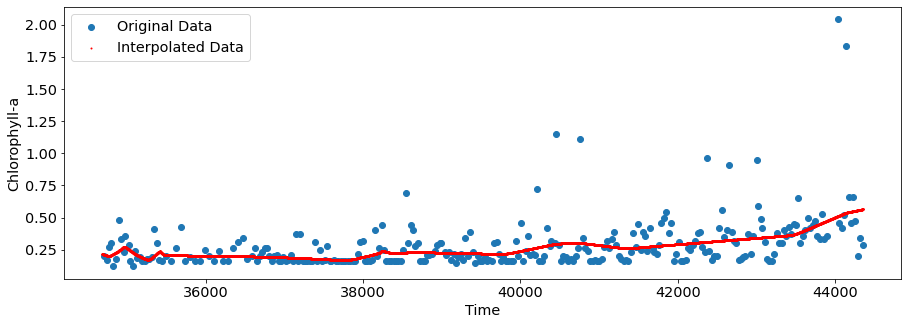

313/313 [==============================] - 0s 324us/step - loss: 3.1079e-17
['loss']


array([[0.04705779],
       [0.04566646],
       [0.04529984],
       [0.04493319],
       [0.04459629],
       [0.04428262],
       [0.04404226],
       [0.04381355],
       [0.04357708],
       [0.0433406 ],
       [0.04310413],
       [0.04283543],
       [0.04250771],
       [0.04219585],
       [0.04186781],
       [0.04153007],
       [0.04119232],
       [0.04085458],
       [0.04051322],
       [0.18857129],
       [0.1926361 ],
       [0.1968364 ]], dtype=float32)

In [2]:
df = pd.read_csv("C:/Users/yanzh/Desktop/chloro_data/BB38.csv")
time = df['time'].values
chlorophylla = df['chlorophylla'].values
df
#Transform the normalized scale to real scale
chlorophylla_min = 0.12
chlorophylla_max = 2.04
time_min = 34710
time_max = 44356.35417

newtimepoints_scaled = np.linspace(time[0] - (time[1] - time[0]),time[-1], 10000)
y_predicted_scaled = model.predict(newtimepoints_scaled)

newtimepoints = newtimepoints_scaled*(time_max - time_min) + time_min
y_predicted = y_predicted_scaled*(chlorophylla_max - chlorophylla_min) + chlorophylla_min
# Display the result
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.scatter(time*(time_max - time_min) + time_min, chlorophylla*(chlorophylla_max - chlorophylla_min) + chlorophylla_min, label='Original Data')
plt.scatter(newtimepoints, y_predicted, c = 'red', s = 1, label = 'Interpolated Data')
plt.xlabel('Time')
plt.ylabel('Chlorophyll-a')
plt.legend()
plt.show()
model.evaluate(newtimepoints_scaled, y_predicted_scaled, batch_size=32)
print(model.metrics_names)
interpolation = model.predict([0.078682577
,0.084798877
,0.09112251
,0.097446142
,0.103769775
,0.110093407
,0.116520706
,0.122637007
,0.128960639
,0.135284272
,0.141607905
,0.147931537
,0.154358836
,0.160475136
,0.166798769
,0.173122402
,0.179446034
,0.185769667
,0.192196966
,0.955697856
,0.95880784
,0.962021489
])
interpolation